#Effect size

**Signifiacnacia**: 
Que tan seguros estamos de que el evento existe
con x% confiabilidad estamos seguros de que el fertilizante A es mejor que el B
Effect size:
Que tanta diferencia ese efecto genera

** El efecto es la altura de la torre, la significancia es la fuerza de sus cimientos**

**Cohen's D**
Si tenemos que evaluar una variable continua con una discreta podemos usar cohen's D

**Odds ratio**
Si tenemos que ver la diferencia entre variables discretas usamos Odds ratio

Que tanto un evento esta relacionado con otro

**coeficiente de correlación**
Que explica la relación de una variable con la otra





cohens d: 9.190420649263382


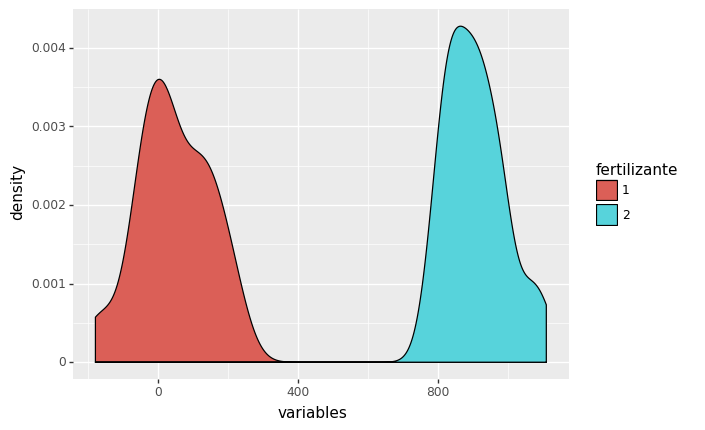

In [37]:
"""
Calculo de cohens D
"""
import numpy as np
import pandas as pd
import scipy as sp
import plotnine as p9
import math as ma

np.random.seed(1)

variable1=np.random.normal(loc=50,scale=100,size=30)
variable2=np.random.normal(loc=90,scale=100,size=30)
variables=np.concatenate((variable1,variable2))
fertilizantes=np.concatenate((np.repeat("1",30),
                             np.repeat("2",30)))
datos=pd.DataFrame({'variables': variables,'fertilizante':fertilizantes})

plot=p9.ggplot(datos)+p9.aes(x="variables",fill="fertilizante")+p9.geom_density(alpha=1)

# utilizando indexación
variable_1=datos[datos.fertilizante=="1"].variables
variable_2=datos[datos.fertilizante=="2"].variables
# calculando cohens d
cd=abs(variable_1.mean()-variable_2.mean())/((variable_1.std()**2
                                             +variable_2.std()**2)/2)**(1/2)
print("cohens d:",cd)
print(plot)

In [17]:
"""
Calculo de Potencia para detección de efecto
"""
import statsmodels
from statsmodels.stats import power as pwr

analisis=pwr.TTestIndPower()

resultado_esperado=analisis.solve_power(
    power=0.8, # probabilidad de detección
    alpha=0.05,
    ratio=1,# tamaño muestral igual por cada grupo
    nobs1=30,
)

print(resultado_esperado)




0.7356198424871614


In [20]:
"""
Detección de asociaciones
"""
moneda1=np.random.binomial(n=1,p=0.05,size=30)
moneda2=np.random.binomial(n=1,p=0.5,size=30)
tabla=pd.crosstab(moneda1,moneda2)
print(tabla)
chi_test=sp.stats.fisher_exact(tabla,alternative="two-sided")
round(chi_test[0],1)
# entre mas se acerca a uno los eventos están mas relacionados 
#ya sea de manera positiva o negativa 


col_0   0   1
row_0        
0      12  17
1       1   0


0.0

(0.9999999999999998, 0.0)


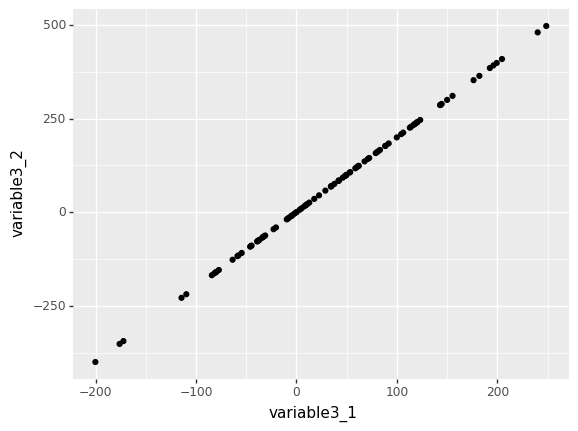

In [33]:
"""
medida de correlaciones
Ejemplificamos una correlación perfecta
"""
np.random.seed(1)
variable3_1=np.random.normal(loc=30,scale=100,size=100)
variable3_2=variable3_1*2
datos2=pd.DataFrame({"variable3_1": variable3_1,"variable3_2":variable3_2})
plot=p9.ggplot(datos2)+p9.aes(x="variable3_1",y="variable3_2")+p9.geom_point()
test=sp.stats.pearsonr(datos2.variable3_1,datos2.variable3_2)
print(test)
print(plot)

In [76]:
"""
Potencia

La potencia hace referncia a la probabilidad de no cometer errores
de tipo 2, esto es decir que no existe un efecto donde  lo hay
podemos mirar como se comporta la potencia alterando diferentes valores 
con nuestra propia distribución para ver cuando es más potente
"""
import statsmodels
from statsmodels.stats import power as pwr
np.random.seed(1)
analisis=pwr.TTestIndPower()
potencia=list()
n_length=list()


for n in range(2,100):
  resultado_esperado=analisis.solve_power(
    effect_size=0.8,#podemos darnos cuenta con este efecto
    power=None, # probabilidad de detección
    alpha=0.05,
    ratio=1,# tamaño muestral igual por cada grupo
    nobs1=n)
  potencia.append(resultado_esperado)
  n_length.append(n)

data_potencia=pd.DataFrame({'potencia':potencia,'nlen':n_length})      
 


In [93]:
plot=p9.ggplot(data_potencia)+p9.aes(x="nlen",y="potencia")+p9.geom_point() 
#para saber desde cuando es potente de manera aceptable podemos 
#filtrar la base de datos
n_optimos=data_potencia[data_potencia.potencia>0.8].nlen # podemos
n_optimo=n_optimos.min()
print(n_optimos)
print(plot)


26
24    26
25    27
26    28
27    29
28    30
      ..
93    95
94    96
95    97
96    98
97    99
Name: nlen, Length: 74, dtype: int64


In [72]:
"""
Podemos variar el alpha para ver que sucede 
una vez teniendo claro nuestro tamaño de muestra optimo
en el ejemplo 26 
"""

import statsmodels
from statsmodels.stats import power as pwr
np.random.seed(1)
analisis=pwr.TTestIndPower()
potencia=list()
alphas=list()
rango=np.arange(0.01,1,0.01)

for a in rango:
  resultado_esperado=analisis.solve_power(
    effect_size=0.8,
    power=None, # probabilidad de detección
    alpha=a,
    ratio=1,# tamaño muestral igual por cada grupo
    nobs1=26)
  potencia.append(resultado_esperado)
  alphas.append(a)

data_potencia2=pd.DataFrame({'potencia':potencia,'alpha':alphas})

4     0.05
5     0.06
6     0.07
7     0.08
8     0.09
      ... 
94    0.95
95    0.96
96    0.97
97    0.98
98    0.99
Name: alpha, Length: 95, dtype: float64


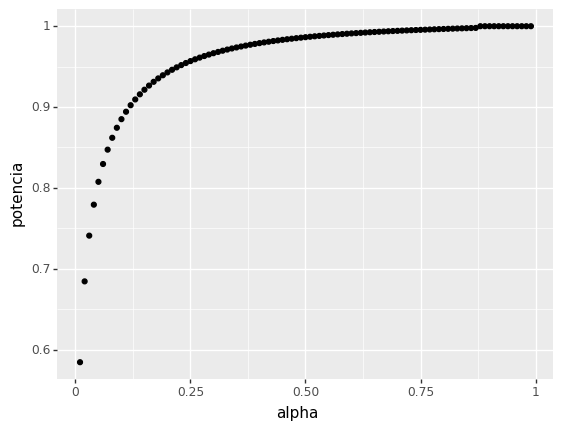

In [74]:
plot=p9.ggplot(data_potencia2)+p9.aes(x="alpha",y='potencia')+p9.geom_point() 
#para saber desde cuando es potente de manera aceptable podemos 
#filtrar la base de datos
print(data_potencia[data_potencia.potencia>0.8].alpha)
"""
podemos identificar un alpha de 0.05 para garantizar una potencia mayor a 0.8
toma en cuenta que si tomaramos un alpha de 0.99 obtendriamos 
una potencia igual pero una confiabilidad de 1% lo cual
no es recomendable por que incrementaria nuestro error tipo 1: 
falsos positivos: decir que hay un efecto cuando no lo hay   
"""
print(plot)

cohens d: 0.5709160688733683
el effecto del diseño es: 0.5709160688733683 el tamaño de muestra ideal es:  50 el alpha recomendado es:  0.05


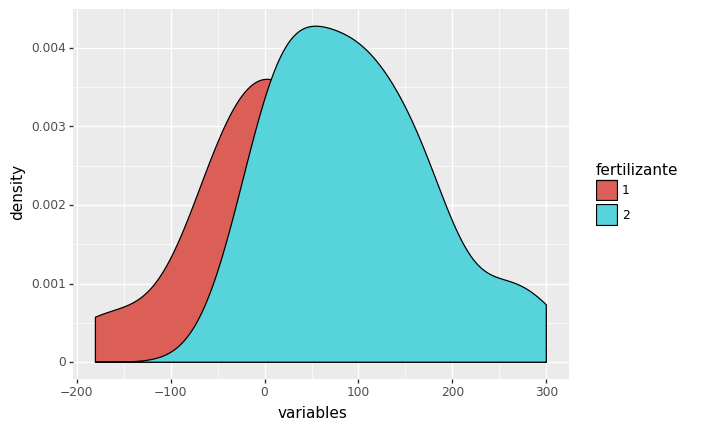

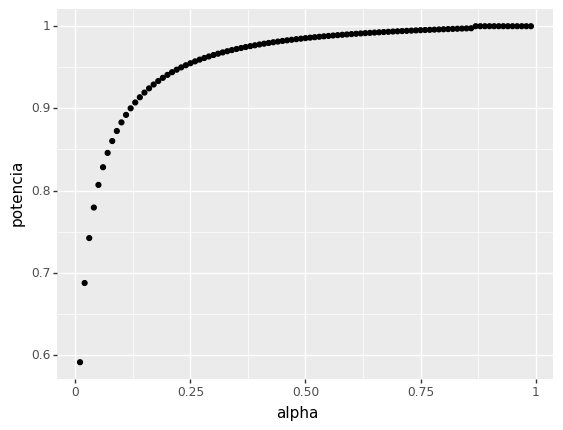

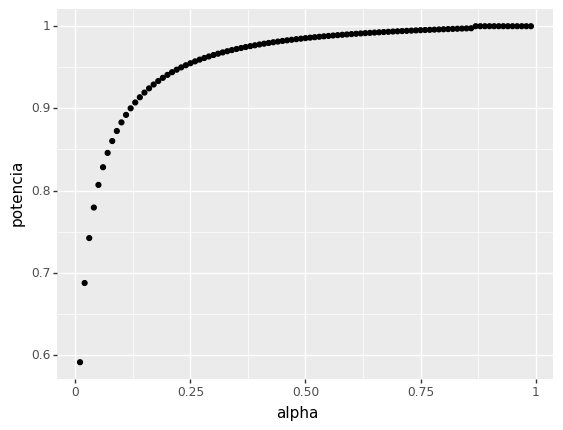

In [99]:
"""
Utilizandolo en nuestro ejemplo inicial
Objetivos
1. Calcular el efecto del diseño
2. Calcular el tamaño(nlen) optimo
3. Calcular el alpha que nos garantize
 una potencia aceptable 
"""

"""
1. Calcular el efecto del diseño
1.1 lo primero que debes hacer es estimar el promedio
y la varianza de tus datos en este caso tenemos un factor 
el efecto de dos fertilizantes.
1.2 Segundo Calcula el efecto del diseño con cohen's D
"""
import numpy as np
import pandas as pd
import scipy as sp
import plotnine as p9
import math as ma

np.random.seed(1)

variable1=np.random.normal(loc=50,scale=100,size=30)
variable2=np.random.normal(loc=90,scale=100,size=30)
variables=np.concatenate((variable1,variable2))
fertilizantes=np.concatenate((np.repeat("1",30),
                             np.repeat("2",30)))
datos=pd.DataFrame({'variables': variables,'fertilizante':fertilizantes})



# utilizando indexación
variable_1=datos[datos.fertilizante=="1"].variables
variable_2=datos[datos.fertilizante=="2"].variables
# calculando cohens d
cd=abs(variable_1.mean()-variable_2.mean())/((variable_1.std()**2
                                             +variable_2.std()**2)/2)**(1/2)
print("cohens d:",cd)

"""
2. Calcular el tamaño(nlen) optimo
2.1 Ahora Calcularemos el tamaño de muestra necesario, para ello
necesitamos nuestro effect size le damos un alpha de 0.05 y simulamos 
el n 
2.3 luego miramos cual n nos garantiza un tamaño óptimo para nuestro 
alpha es decir una confiabilidad del 95% y una potencia mayor  80% 
"""

analisis=pwr.TTestIndPower()
potencia=list()
n_length=list()


for n in range(2,100):
  resultado_esperado=analisis.solve_power(
    effect_size=cd,#podemos darnos cuenta con este efecto
    power=None, # probabilidad de detección
    alpha=0.05,# identificando el effect size
    ratio=1,# tamaño muestral igual por cada grupo
    nobs1=n)
  potencia.append(resultado_esperado)
  n_length.append(n)

data_potencia=pd.DataFrame({'potencia':potencia,'nlen':n_length}) 
n_optimos=data_potencia[data_potencia.potencia>0.8].nlen # podemos
n_optimo=n_optimos.min()

"""
3. Calcular el alpha que nos garantize
 una potencia aceptable
 3.1 simular el alpha con respecto al tamaño de muestra optimo
 3.2 identificar el alpha que nos garantiza una confiabilidad del 95%
  y una potencia mayor  80% 
"""     


analisis=pwr.TTestIndPower()
potencia=list()
alphas=list()
rango=np.arange(0.01,1,0.01)

for a in rango:
  resultado_esperado=analisis.solve_power(
    effect_size=cd,
    power=None, # probabilidad de detección
    alpha=a,
    ratio=1,# tamaño muestral igual por cada grupo
    nobs1=n_optimo)
  potencia.append(resultado_esperado)
  alphas.append(a)

data_potencia2=pd.DataFrame({'potencia':potencia,'alpha':alphas})
alphas_optimos=data_potencia2[data_potencia2.potencia>0.8].alpha # podemos
alpha_optimo=alphas_optimos.min()

plot1=p9.ggplot(datos)+p9.aes(x="variables",fill="fertilizante")+p9.geom_density(alpha=1)
plot2=p9.ggplot(data_potencia2)+p9.aes(x="alpha",y='potencia')+p9.geom_point() 
plot3=p9.ggplot(data_potencia2)+p9.aes(x="alpha",y='potencia')+p9.geom_point() 

print("el effecto del diseño es:",cd,
      "el tamaño de muestra ideal es: ",n_optimo,
      "el alpha recomendado es: ",alpha_optimo      
      )
print(plot1,plot2,plot3)